In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("cancer patient data sets.csv")

In [2]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
df.drop('Patient Id', axis=1, inplace=True)

In [5]:
df.drop('index', axis=1, inplace=True)

In [6]:
# Create composite risk score
df['Total_Risk'] = df['Air Pollution'] + df['Alcohol use'] + df['Smoking']

# Bin age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Age_Group'])

In [7]:
df.head()

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Frequent Cold,Dry Cough,Snoring,Level,Total_Risk,Gender_1,Gender_2,Age_Group_Young,Age_Group_Middle,Age_Group_Senior
0,33,2,4,5,4,3,2,2,4,3,...,2,3,4,Low,9,True,False,False,True,False
1,17,3,1,5,3,4,2,2,2,2,...,1,7,2,Medium,6,True,False,True,False,False
2,35,4,5,6,5,5,4,6,7,2,...,6,7,2,High,11,True,False,False,True,False
3,37,7,7,7,7,6,7,7,7,7,...,6,7,5,High,21,True,False,False,True,False
4,46,6,8,7,7,7,6,7,7,8,...,4,2,3,High,22,True,False,False,True,False


In [8]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [9]:
features = [
    'Air Pollution', 'Alcohol use', 'Smoking', 'Total_Risk',
    'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet',
    'Gender_1', 'Gender_2', 'Age_Group_Young',
    'Age_Group_Middle', 'Age_Group_Senior'
]
X = df[features]
y = df['Level']

In [10]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='int64').columns.tolist()

In [11]:
df['Level'] = df['Level'].fillna('Low')
y = df['Level'].map({'Low':0, 'Medium':1, 'High':2}).astype(int)

# Verify
print("Cleaned target values:", y.unique())


Cleaned target values: [0 1 2]


In [12]:
#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [14]:
# Initialize baseline model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

In [15]:
# Train model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
[[61  0  0]
 [ 0 66  0]
 [ 0  0 73]]


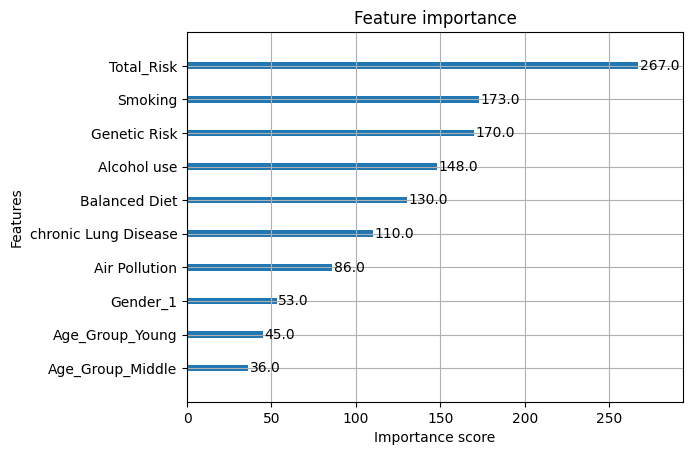

In [16]:
#Evaluation
# Generate predictions
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10)
plt.show()

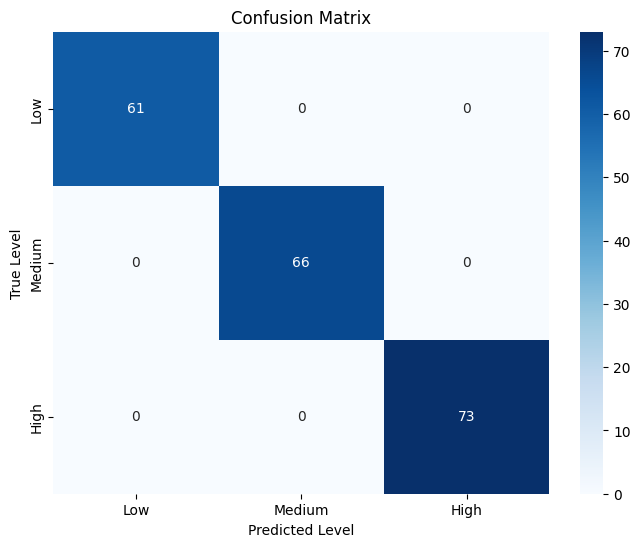

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from the previous steps

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Level')
plt.ylabel('True Level')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Calculate training vs test accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Diagnose:
if train_acc > test_acc + 0.1:  # Significant gap
    print("Overfitting detected! Apply regularization")
elif train_acc < 0.8:  # Low performance on training data
    print("Underfitting detected! Increase model complexity")
else:
    print("Good generalization performance")

Training Accuracy: 1.0000
Test Accuracy: 1.0000
Good generalization performance


In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize and run grid search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=3),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Re-evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.99      1.00      0.99        66
           2       1.00      1.00      1.00        73

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [20]:
# Final overfitting check
train_acc_tuned = best_model.score(X_train, y_train)
test_acc_tuned = best_model.score(X_test, y_test)
print(f"Tuned Model Training Accuracy: {train_acc_tuned:.4f}")
print(f"Tuned Model Test Accuracy: {test_acc_tuned:.4f}")

Tuned Model Training Accuracy: 1.0000
Tuned Model Test Accuracy: 0.9950


In [21]:
import pickle
with open('cancer_risk_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)